# Deep Neural Networks application

Purpose: Train a DNN based on features extracted from insect images (Ong, 2022)

Authors: Gabriel R. Palma

## Loading packages

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# Importing section
from tensorflow.keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
import numpy as np
from keras import backend as K
import os
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
# Paper Correction
from keras import metrics
# End importing section
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from scipy.io import wavfile
import pylab
from tensorflow.keras.utils import to_categorical
datagen = ImageDataGenerator(rescale=1)
batch_size = 32
from keras.layers import LeakyReLU, Conv2D, Input, BatchNormalization, Activation, Dense, Dropout, Conv2DTranspose, concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam, RMSprop
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Functions used in this project

In [2]:
def scale_features(explanatory_variables):
    '''This function scale the variables based on their maximum and minimun value'''
    
    scaler = MinMaxScaler() # Scaling the variables
    scaler.fit(explanatory_variables)
    explanatory_variables = scaler.transform(explanatory_variables)
    
    return(explanatory_variables)

# Loading the data

In [3]:
train_dataset_dnn = pd.read_csv('../../output_data/Diptera_parameters_train.csv').drop(columns = 'Unnamed: 0')
test_dataset_dnn = pd.read_csv('../../output_data/Diptera_parameters_test.csv').drop(columns = 'Unnamed: 0')

In [18]:
test_dataset_dnn

,Aspect ratio,Countour area,R average,G average,B average,R 0.25 % quantile,G 0.25 % quantile,B 0.25 % quantile,R 97.5 % quantile,G 97.5 % quantile,B 97.5 % quantile,Class
0,0.948529,5748.0,220.702009,219.789820,221.338010,51.0,56.0,62.0,238.0,238.0,239.0,1.0
1,1.168224,7045.5,208.658363,206.978755,208.423489,52.0,44.0,51.0,226.0,226.0,227.0,3.0
2,0.969925,6747.5,231.006736,230.377890,230.878388,60.0,61.0,62.0,249.0,249.0,249.0,1.0
3,0.863946,6956.5,213.174027,211.627870,212.719946,43.0,37.0,40.0,233.0,233.0,233.0,0.0
4,1.269565,7164.5,198.287428,194.817323,197.512357,48.0,36.0,47.0,215.0,215.0,216.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
843,0.734513,4162.0,196.237643,194.549705,195.608119,59.0,35.0,46.0,208.0,208.0,208.0,4.0
844,0.993377,8976.0,183.377332,182.305385,183.374402,21.0,20.0,21.0,209.0,209.0,209.0,0.0
845,0.734807,10114.5,208.519272,206.502790,207.808873,51.0,43.0,48.0,229.0,229.0,229.0,3.0
846,0.750000,6993.0,222.760583,220.487524,222.041992,67.0,58.0,64.0,242.0,242.0,242.0,3.0


In [19]:
train_dataset_dnn.groupby('Class').describe()

Aspect ratio                                                    \
             count      mean       std       min       25%       50%   
Class                                                                  
0.0          530.0  0.964924  0.229992  0.358025  0.797834  0.959730   
1.0          409.0  1.047181  0.242451  0.523179  0.854545  1.026316   
2.0          341.0  1.009748  0.311083  0.424390  0.786585  0.965278   
3.0          398.0  1.050112  0.330838  0.448087  0.776071  1.031754   
4.0          349.0  0.776385  0.286367  0.311828  0.581522  0.721805   

                          Countour area               ... G 97.5 % quantile  \
            75%       max         count         mean  ...               75%   
Class                                                 ...                     
0.0    1.086420  1.615385         530.0  3113.092453  ...            252.75   
1.0    1.250000  1.634409         409.0  6692.558680  ...            249.00   
2.0    1.221154  1.886076         341.0  7120.807918  ...            243.00   
3.0    1.294240  1.880435         398.0  7692.768844  ...            242.00   
4.0    0.945736  3.343284         349.0  4935.553009  ...            223.00   

             B 97.5 % quantile                                              \
         max             count        mean        std    min    25%    50%   
Class                                                                        
0.0    255.0             530.0  248.167925   7.276351  221.0  245.0  250.0   
1.0    254.0             409.0  246.466993   5.112893  220.0  244.0  247.0   
2.0    252.0             341.0  237.674487   9.434740  211.0  232.0  238.0   
3.0    251.0             398.0  237.042714   8.288299  206.0  234.0  237.0   
4.0    234.0             349.0  213.687679  11.319163  183.0  206.0  214.0   

                     
         75%    max  
Class                
0.0    254.0  255.0  
1.0    249.0  255.0  
2.0    245.0  255.0  
3.0    243.0  255.0  
4.0    223.0  235.0  

[5 rows x 88 columns]

In [6]:
test_dataset_dnn.groupby('Class').describe()

Aspect ratio                                                    \
             count      mean       std       min       25%       50%   
Class                                                                  
0.0          201.0  1.053810  0.247217  0.528455  0.869565  1.036697   
1.0          177.0  0.927893  0.201034  0.436364  0.782609  0.918699   
2.0          147.0  1.062164  0.247814  0.511236  0.844541  1.076471   
3.0          172.0  0.904104  0.231282  0.401099  0.723463  0.894338   
4.0          151.0  0.833263  0.242269  0.323077  0.665230  0.803571   

                          Countour area               ... G 97.5 % quantile  \
            75%       max         count         mean  ...               75%   
Class                                                 ...                     
0.0    1.206349  1.781250         201.0  6318.557214  ...             252.0   
1.0    1.078947  1.548780         177.0  6050.457627  ...             243.0   
2.0    1.212912  1.719512         147.0  8544.537415  ...             243.0   
3.0    1.061641  1.589744         172.0  7272.418605  ...             235.0   
4.0    0.987630  1.475000         151.0  4292.384106  ...             213.0   

             B 97.5 % quantile                                              \
         max             count        mean        std    min    25%    50%   
Class                                                                        
0.0    254.0             201.0  243.024876  14.676320  206.0  233.0  249.0   
1.0    249.0             177.0  238.090395   8.009424  213.0  236.0  239.0   
2.0    252.0             147.0  236.949830  11.029931  209.0  231.0  236.0   
3.0    248.0             172.0  229.517442   9.178206  205.0  226.0  230.0   
4.0    227.0             151.0  207.090232   9.258478  186.0  201.0  207.0   

                      
          75%    max  
Class                 
0.0    255.00  255.0  
1.0    244.00  249.0  
2.0    247.00  255.0  
3.0    235.25  248.0  
4.0    213.00  228.0  

[5 rows x 88 columns]

In [7]:
test_dataset_dnn[test_dataset_dnn['Class'] == 4]

,Aspect ratio,Countour area,R average,G average,B average,R 0.25 % quantile,G 0.25 % quantile,B 0.25 % quantile,R 97.5 % quantile,G 97.5 % quantile,B 97.5 % quantile,Class
9,0.409722,3500.0,188.999621,187.302455,188.562101,72.0,48.0,63.0,199.0,199.0,199.0,4.0
27,1.333333,3194.5,192.006318,190.058972,191.284239,90.0,49.0,73.0,200.0,200.0,201.0,4.0
30,0.726316,2955.5,193.060148,192.110591,192.664501,110.0,71.0,97.0,200.0,200.0,200.0,4.0
35,0.473214,6355.0,202.093351,199.387297,201.049964,62.0,37.0,49.0,215.0,215.0,215.0,4.0
42,0.489051,3996.5,189.904397,188.535096,189.320332,105.0,61.0,90.0,197.0,197.0,197.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
836,0.813559,3851.5,194.783721,192.899912,194.122489,102.0,60.0,87.0,202.0,202.0,202.0,4.0
838,0.660000,4398.0,196.995954,194.350885,196.046576,90.0,49.0,74.0,206.0,206.0,206.0,4.0
841,0.575893,5605.5,194.249063,192.252870,193.937899,69.0,40.0,55.0,205.0,205.0,206.0,4.0
842,0.944444,5781.5,185.953703,184.640565,185.507932,52.0,31.0,41.0,197.0,197.0,197.0,4.0


In [8]:
train_x = scale_features(np.array(train_dataset_dnn.drop(columns = 'Class')))
train_y = np.array(to_categorical(train_dataset_dnn['Class']))
test_x = scale_features(np.array(test_dataset_dnn.drop(columns = 'Class')))
test_y = np.array(to_categorical(test_dataset_dnn['Class']))

# Creating the model

In [9]:
model = models.Sequential()
model.add(layers.Dense(10, activation=LeakyReLU(alpha=0.3), input_shape=(11,)))
model.add(layers.Dense(5, activation='softmax'))
model.summary() 

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
Total params: 175
Trainable params: 175
Non-trainable params: 0
_________________________________________________________________


2024-05-30 06:37:28.962627: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-30 06:37:28.963043: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.load_weights('simple_dnn.h5')
model.compile(optimizer=Adam(), 
                 loss='categorical_crossentropy', 
                 metrics=["accuracy"])

In [20]:
model.evaluate(train_x, train_y)

64/64 [==============================] - 1s 7ms/step - loss: 0.6393 - accuracy: 0.7533


[0.6393169164657593, 0.7533300518989563]

In [21]:
model.evaluate(test_x, test_y)

27/27 [==============================] - 0s 8ms/step - loss: 1.3789 - accuracy: 0.5979


[1.3789215087890625, 0.5978773832321167]

In [13]:
dnn_predictions = tf.math.argmax(model.predict(test_x), axis=1)

27/27 [==============================] - 0s 2ms/step


2024-05-30 06:37:44.769602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [22]:
cm = confusion_matrix(dnn_predictions, test_dataset_dnn['Class'])

In [23]:
cm

array([[ 54,   2,  14,   0,   0],
       [ 77, 143,   0,   0,   0],
       [ 11,   7,   2,   0,   0],
       [ 59,  25, 124, 157,   0],
       [  0,   0,   7,  15, 151]])

In [15]:
total_specimens = np.bincount(test_dataset_dnn['Class'])

In [16]:
total_specimens

array([201, 177, 147, 172, 151])

In [17]:
np.diag(cm) / total_specimens

array([0.26865672, 0.8079096 , 0.01360544, 0.9127907 , 1.        ])

# Trainning the model

In [31]:
callbacks = [    
    ModelCheckpoint('simple_dnn2.h5', verbose = 1, save_best_only = True, 
                    save_weights_only = True, monitor='val_acc')
]

In [32]:
model.compile(optimizer = Adam(), loss='categorical_crossentropy', 
              metrics=['acc', metrics.Precision(), metrics.Recall()])
dnn_data = model.fit(train_x, train_y, 
                    batch_size=32, epochs=60, callbacks=callbacks,
                    validation_data=(test_x, test_y))

Epoch 1/60


2024-05-27 00:03:39.510470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


64/64 [==============================] - ETA: 0s - loss: 0.6393 - acc: 0.7504 - precision_1: 0.8673 - recall_1: 0.5802

2024-05-27 00:03:41.221253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.59670, saving model to simple_dnn2.h5
64/64 [==============================] - 3s 27ms/step - loss: 0.6393 - acc: 0.7504 - precision_1: 0.8673 - recall_1: 0.5802 - val_loss: 1.3911 - val_acc: 0.5967 - val_precision_1: 0.6478 - val_recall_1: 0.4988
Epoch 2/60
64/64 [==============================] - ETA: 0s - loss: 0.6338 - acc: 0.7499 - precision_1: 0.8627 - recall_1: 0.6014
Epoch 2: val_acc did not improve from 0.59670
64/64 [==============================] - 1s 21ms/step - loss: 0.6338 - acc: 0.7499 - precision_1: 0.8627 - recall_1: 0.6014 - val_loss: 1.4165 - val_acc: 0.5731 - val_precision_1: 0.6356 - val_recall_1: 0.4752
Epoch 3/60
64/64 [==============================] - ETA: 0s - loss: 0.6280 - acc: 0.7548 - precision_1: 0.8646 - recall_1: 0.5920
Epoch 3: val_acc did not improve from 0.59670
64/64 [==============================] - 1s 22ms/step - loss: 0.6280 - acc: 0.7548 - precision_1: 0.8646 - recall_1: 0.5920 - val_loss: 1.4420 - val

64/64 [==============================] - 1s 22ms/step - loss: 0.5451 - acc: 0.7908 - precision_1: 0.8757 - recall_1: 0.6566 - val_loss: 1.5450 - val_acc: 0.5637 - val_precision_1: 0.6091 - val_recall_1: 0.5236
Epoch 23/60
61/64 [===========================>..] - ETA: 0s - loss: 0.5408 - acc: 0.7879 - precision_1: 0.8719 - recall_1: 0.6660
Epoch 23: val_acc did not improve from 0.59670
64/64 [==============================] - 1s 22ms/step - loss: 0.5406 - acc: 0.7893 - precision_1: 0.8725 - recall_1: 0.6650 - val_loss: 1.5662 - val_acc: 0.5601 - val_precision_1: 0.6108 - val_recall_1: 0.5200
Epoch 24/60
62/64 [============================>.] - ETA: 0s - loss: 0.5377 - acc: 0.7954 - precision_1: 0.8777 - recall_1: 0.6653
Epoch 24: val_acc did not improve from 0.59670
64/64 [==============================] - 1s 22ms/step - loss: 0.5375 - acc: 0.7953 - precision_1: 0.8767 - recall_1: 0.6665 - val_loss: 1.5891 - val_acc: 0.5613 - val_precision_1: 0.6057 - val_recall_1: 0.5271
Epoch 25/60
64

Epoch 44/60
63/64 [============================>.] - ETA: 0s - loss: 0.4707 - acc: 0.8333 - precision_1: 0.8994 - recall_1: 0.7272
Epoch 44: val_acc did not improve from 0.59670
64/64 [==============================] - 1s 22ms/step - loss: 0.4703 - acc: 0.8333 - precision_1: 0.8999 - recall_1: 0.7272 - val_loss: 1.8460 - val_acc: 0.5672 - val_precision_1: 0.6092 - val_recall_1: 0.5495
Epoch 45/60
62/64 [============================>.] - ETA: 0s - loss: 0.4710 - acc: 0.8231 - precision_1: 0.8855 - recall_1: 0.7288
Epoch 45: val_acc did not improve from 0.59670
64/64 [==============================] - 1s 23ms/step - loss: 0.4675 - acc: 0.8259 - precision_1: 0.8870 - recall_1: 0.7316 - val_loss: 1.8239 - val_acc: 0.5637 - val_precision_1: 0.6085 - val_recall_1: 0.5425
Epoch 46/60
64/64 [==============================] - ETA: 0s - loss: 0.4647 - acc: 0.8392 - precision_1: 0.9018 - recall_1: 0.7385
Epoch 46: val_acc did not improve from 0.59670
64/64 [==============================] - 1s 22

In [33]:
exploratory_performance = pd.DataFrame(dnn_data.history)
exploratory_performance.to_csv("../../output_data/dnn.csv")

In [34]:
exploratory_performance.head()

,loss,acc,precision_1,recall_1,val_loss,val_acc,val_precision_1,val_recall_1
0,0.639349,0.750370,0.867257,0.580168,1.391065,0.596698,0.647779,0.498821
1,0.633776,0.749877,0.862703,0.601381,1.416454,0.573113,0.635647,0.475236
2,0.627954,0.754810,0.864553,0.592008,1.441962,0.569575,0.613876,0.479953
3,0.623122,0.750863,0.864865,0.599901,1.448792,0.571934,0.612368,0.478774
4,0.618413,0.753823,0.870991,0.602861,1.421160,0.586085,0.624633,0.502358


<AxesSubplot:>

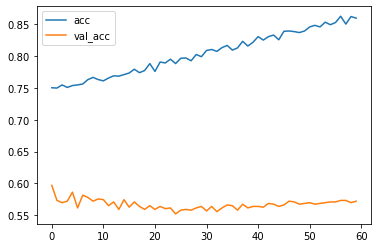

In [35]:
exploratory_performance[['acc', 'val_acc']].plot()